In [1]:
#first need to import the necessary libraries
from Bio import Phylo
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
import urllib

In [2]:
# There are 10 members in the Copper amine oxidase family (CuAO) in the plant Arabidopsis thaliana. 
# First, create 10 SeqRecord objects for the coding sequence of each gene, including their corresponding gene name

rec1 = SeqRecord(
    Seq("ATGAACACATCAATACTTGCCATACTTTTTCTCATACAATGTGTTTTCACTCTTGGTCTCCATTTCCACCCACTTGATCCCTTAACTCCCCAAGAAATCAACAAAACAAGCTTTATCGTCAAGAAATCTCATCTAGGCAACCTCAAAGATCTCACATTTCATTATCTCGACCTCGAAGAACCAAACAAGAGCCACGTCCTCCAATGGCTATCACCAAATCCCTCCAAGAAACCACCACCCCCACGTCGTCGCTCATTCGTCGTGGTTCGAGCCGGTGGTCAAACCTACGAGCTCATCATCGACCTAACCACGAGCAAGATTGCATCCTCCCGCATCTACACAGGCCATGGTTTCCCCTCATTCACATTCATAGAGCTTTTCAAAGCAAGCAAGCTTCCTCTAACTTACCCACCTTTCAAGAAATCGATTCTCGATCGATCCCTAAACATCTCCGAGGTTTCTTGCATCCCTTTCACCGTTGGTTGGTACGGAGAAACCACCACGAGACGTGAACTCAAAGCCTCTTGCTTTTACAGAGACGGATCAGTCAACGTCTTCACAAGACCCATCGAAGGAATCACCGTAACTATAGACGTCGACTCAATGCAAGTCATCAAGTACTCCGACAGATTCCGAAAGCCTATCCCTGATAAAGAAGGTAACGACTTTAGGACTAAACACAGACCCTTCCCGTTCTTTTGCAACGTCTCCGACACAGGCTTCAAGATACTCGGCAATAGAGTCAAGTGGGCTAACTGGAAATTCCACGTCGGATTTACCGCAAGAGCGGGAGTAACTATATCGACGGCTTCGGTTCTTGACCCGAGAACCAAAAGGTTTCGACGAGTGATGTATAGAGGGCACGTGTCAGAGACTTTTGTTCCGTACATGGACCCAACCTACGAATGGTACTACCGTACGTTCATGGACATTGGAGAGTTTGGTTTCGGGAGATCCGCCGTGAATCTGCAGCCACTCATTGACTGCCCGCAAAACGCTGCGTTTTTAGATGGGCACGTGGCCGGACCAGATGGGACAGCTCAGAAGATGACCAATGTGATGTGTGTATTCGAGAAAAACGGTTACGGTGCTTCTTTTAGACACACCGAGATTAATGTTCCAGGACAAGTGATAACAAGTGGGGAAGCTGAAATAAGTTTAGTGGTTAGAATGGTGGCCACACTTGGAAACTATGATTACATAGTGGATTGGGAATTTAAAAAGAATGGAGCCATCAGAGTTGGGGTGGATTTGACTGGAGTTTTAGAAGTAAAAGCGACATCGTACACTTCAAACGATCAAATAACGGAGAACGTATACGGTACACTGGTGGCGAAGAACACTATCGCCGTTAACCACGACCATTACCTAACGTACTACTTGGACCTCGACGTTGACGGTAACGGCAATTCCTTGGTGAAAGCCAAACTCAAAACGGTAAGAGTAACGGAAGTTAACAAAACGTCTTCTCGGAGGAAGAGTTACTGGACGGTCGTTAAAGAGACGGCGAAAACGGAAGCTGACGGTAGAGTTCGACTCGGCTCGGATCCGGTTGAGCTGTTAATAGTAAACCCGAACAAGAAGACGAAAATAGGAAATACAGTTGGTTACCGGCTGATACCGGAACATTTACAAGCCACTTCGCTTTTAACCGATGATGATTACCCCGAGTTAAGAGCCGGTTACACGAAATATCCGGTTTGGGTGACCGCCTATGACCGGTCCGAGAGATGGGCCGGTGGGTTTTATAGTGATCGGAGCCGTGGCGATGACGGTTTAGCTGTATGGAGTAGTAGGAACAGAGAGATAGAGAACAAAGACATAGTGATGTGGTACAACGTTGGGTTTCATCACATTCCATACCAAGAGGATTTTCCGGTTATGCCAACTCTTCACGGTGGTTTTACTCTTCGGCCTTCAAATTTCTTCGATAACGATCCTTTGATTGGGTAA",
    ),
    id = "CuAObeta",
)
rec2 = SeqRecord(
    Seq("ATGGCAGAACCATCTTTTGCTCGTCTGTTTCTCTTGTTCTTCAGCTTTCTCCTTATCTTTGCCACCTACTCTTGGGTCTTTGGACCCGACTCAGGCTTCTTGTTCGGTACTCGTGTCCGGAAAACTCTCGGCTCGAATCGTCAAGTCCACGTTGACCACTCTTTAGAAAAGCCTCATCATCCACTTGATCCACTAACGGTGCGAGAAATCAATAGAGTCAGAACAATACTCTCGAACCATGACCCGGGTTTTGGTTCCGGGTCGGCCACGATTCACTCCATGGCTCTCGATGAGCCGGAGAAGTCACGTGTCGTCCAGTGGAAGAAGGGAAATAAGCTTCTGTCACGAAGAGCTGCGGTCGTAGCTTATTGGGGTGGTCAAACACATGAGATAACGGTGGATCTTGATTCGGGTCGGGTAGTTTCTGATGTGATTAACCGGACTTCAGGGTATCCGATTCTCACCTTGAACGACGTCTTCGCTGCTTCGCAGGTTCCTTTGAAGAGCTTGGAATTTAACCGCTCCATTGAAGCTCGTGGGGTTAAGTTTTCCGATTTAGCTTGCATCACACCGTTTGCCGGATGGTTTGGATCGGAGGAAGAAGGACGTAGAGTCATAAGAGTTCAATGTTTCACGTTACAAGGCACTACCAATTATTTTATGAGACCACTCGAAGGACTTTATGTAACGGTCGATCTAGACAAATTGGAGGTTATCAAGATCATCGATAAAGGCCCAATTCCAATTCCCAAAGCCTCCGGTACAGAATACCGGTTTGGTGTTCAGAATAAACCGGTGCATATGGATCGTATTAACCCGATTTCGATGGAGCAACCTGACGGTCCCAGTTTTAGGGTCGAAGATGGGCATTTGGTTAAGTGGGCTAATTGGGTTTTCCATGTTAAAGCTGACCAACGAGCCGGTATGATCATATCTCAGGCCACGGTTCGTGACTCCGAGACAGGTGAACCAAGAAGTGTGATGTACAAAGGATTCCCATCAGAGTTGTTTGTACCGTACATGGACCCTGAGGAAGGATGGTACTACAAAGGTTATATGGATGCAGGCGAGCTCGGTTTAGGACCCACGGCAATGCCGCTCGTGCCTCTCAACGATTGCCCTCGAAATTCTTACTATATAGACGGTGTTTTCGCCTCTCCAGACGGCAAACCCATTGTTCAACCTAATATGATATGCTTGTTTGAACGCTATGCAGGCGATATCAGCTGGCGACATTCTGAGATCCTTTTTGCCAATGCCGATATAAGAGAGTCAAGGCCAAAAGTTACATTGGTAGCTCGAATGGCAACTTCGGTTGGAAATTACGACTATATTTTCGATTGGGAGTTTCAGACTGATGGTTTGATCCGTGTTACGGTCGCGGCTTCGGGAATGTTAATGGTGAAAGGGACACCTTACGATAATGTAGATGACTTAGGTGATAGGGAGGATGATGCTGGACCGTTGATCTCTGAGAATGTGATTGGAGTCGTTCATGATCATTTCATAACGTTTCATCTAGACATGGATATTGATGGACCGATGAATAATTCTTTGGTTAAGGTTCATCTAGAGAAGCAGAGAGTTCCAACAGGAAAATCGCCAAGGAAGAGTTACTTGAAGGTCAAGAAATATATAGCCAAGACTGAGAAAGATGCTCAGATCAAGTTGAGCCTCTATGACCCATATGAATTCCACATTGTGAACCCGAACCGAAAATCTCGGGTAGGAAACCCGGCTGGTTACAGGATCGTACCGGGTGGTAATGCAGCGAGTTTGCTTGATCACGATGATCCTCCTCAAATTCGAGGTGCATTCACTAATAATCAGATATGGGTGACTCCATATAACCGGTCAGAACAATATGCCGGAGGAGTTCTAATTTACCAGAGCCAAGGTGATGACACACTACAAGTTTGGTCAGACCGGGACCGTTCGATCGAAAACAAGGACATAGTACTGTGGTACACACTAGGGTTCCATCACGTACCTTGTCAAGAAGATTATCCAGTTATGCCAACCGTTGCGGCTAGCTTTGAACTTAAACCAGCAAATTTCTTTGAATCCAATCCGATTCTTGGGTCTGCTCCTTTCTTCGAAAAAGACTTACCGGTCTGTAGACCATTTGCTTCATCTTGA",
    ),
    id = "CuAOgamma1",
)
rec3 = SeqRecord(
    Seq("ATGGAGCCAAAACTCTCCTCTCGTTTGTTTCTTCTCATCACCACGGCTTGTTTCATCCTCTTATTCACTTCCACTAACTTCTCTCAAGCGCCATCATCCACGGCGAAGCTTTTCGACTGCACAAAATCTTCGTCTTCACCTTTTTGTGCGTCAAGAAACTTCCTCTTTAACAAAAACACTCGGCCCATTTCTAAAAACATTCCCAAAACAAAACCCAAAAACCATGACCACGTTTCCGATACACCGAACCACCCTCTTGACCCACTTACCGTCATGGAGATCAACAAAGTCCGATCAATCCTCTCCTCCCACGCGCTCTTCGCCTCACGTGTACCCCACTTGCTTAACTCCGTCGTTCTTGAAGAGCCAGACAAGAATCTAGTCAGACAATGGGAGAAAGGAGACCAACTACCACCAAGAAAGGCCTCAGTGATCGCACGTGTTGGCGGCAACTCGCACTTGCTCATCGTTGACTTATCTACAAGTCGTGTTGATCAAGCGGATAGTCCGGTTCCTGAATCCGGTTACCCGATTGTGACGTCGGAGGAGATGGACAGTGCCGCGTCTGCACCGTTCTCAAACGCAGATTTCAACCGTACGATCAACTCTCGTGGAGTTAATCTAACGGACGTGATTTGTATCCCAATCTCTAGTGGCTGGTTTGGTAATAAAGACGACAACACCAAAAGGGTTACTAAAATTCAGTGTTTCTCAACTCAAGATACCCCTAATTTCTACATGCGACCTATCGAAGGTTTGACTCTGCTTTTTGATTTAGACACGAAGCGAATACTTGAGATAACAGATACCGGTCAATCAATACCCATACCCGGTTCAACTAATACCGATTATCGATATTCTACTCTTCCAAACCATGACAAAACCAGACCCCTCAATACAATATCACTCGAGCAGCCACGTGGACCAAGCTTCGTTATCGAAGATAACCATTTAGTAAAATGGGCAAATTGGGAATTTCATTTAAAACCAGACCCGAGAGCCGGTCTGATTATGTCCCAGGTCAAAATACACGACCCGGATACACAAGAAACACGTGAAGTGATGTACAAAGGTTTCGTGTCGGAGCTTTTTGTTCCGTACATGGATCCATCGGAAGCTTGGTACTTTAAGACTTACATGGACGCAGGAGAGTACGGGTTCGGGTTACAAGCCATGCCGCTGGAGCCAGTGGCGGAGCCAAAAAACTTATTCATCGGGCCGCTTAATGATTGTCCAAGAAACGCCGTTTATATGGACGGAACATTCGCGGCGGCTGACGGAACGCCATATGTGAGAGAGAATATGATTTGTGTGTTTGAGAGTTATGCCGGAGATATTGCGTGGCGTCACACCGAGTATCCCGTCAACGGTATGCCGAACTGA",
    ),
    id = "CuAOepsilon1",
)
rec4 = SeqRecord(
    Seq("ATGGACCAAAAAAGCTTTTTCCGGTTGATTTTTCTCATAGTCACAGCTGGTTTCATCATCTCCTTCACTTCCACTAACTTCCCTCACGCGCCGACGAGGCTTCTTGATTGCACCGACTCTTCTTCTTCACCTCTTTGCGCTTCGAGAAACTTTCTTTTCAACAAACAACAACCACGACCTATTCCTAAACATGATCCTAAACCAAATACCAAAAACCATGATCACGTGTCCGATACACCAAACCATCCTCTAGACCCACTCACGGTGTCGGAGATTAACAAAATCCGATCAATACTCTCTTCTCACGCGCTATTCACTTCCGGTACACCACACGCGCTCCACACCGTCGTTCTTGAAGAGCCTGAGAAGAATCTTGTCCGTCACTGGGAAAAAGGGAACCCACTTCCTCCGAGGAAAGCTTCCGTCATCGCACGTGTTGGCGCGGACACGCACGTGCTCACCGTTGATATCTCTACGGGTCGGGTAGATTCAGAGAATAGCCCGGTTCGTGTTTCTGGTTACCCGATGATGACTATAGAAGAGATGAACGATATCACTGTTGTACCATTTTCAAACGCGGATTTCAACCGTACGATCATCTCTCGTGGAGTTAATCTAACGGACGTGATTTGTTTCCCAATCTCTTGTGGTTGGTTTGGTAATAAAGAAGAAAACGCGAGGGTAATTAAAAGTCAGTGTTTCATGACACAAGGAACACCTAACTTCTACATGCGTCCTATCGAAGGTTTAACCATTCTCATCGATTTAGATACAAAGCAAGTGATCGAGATAACCGATACAGGTCGGGCTATACCCATACCCGGTTCAACCAATACCGATTACCGCTTCCAAAAGCTCGCAACCACCGACAAAACTCGGCCTCTAAACCCGATATCCATTGAGCAGCCACGTGGTCCAAGCTTCGTGATAGAGGACAACCATCTAGTGAAATGGGCAAATTGGGAATTTCATCTAAAACCTGACCCGAGAGCAGGTGTGGTAATATCACGGGTAAGAGTACACGACCCGGATACTCATGAGACACGTGACGTGATGTACAAAGGTTTCGTGTCTGAACTTTTTGTTCCGTACATGGATCCATCGGACGCGTGGTACTTTAAGACTTACATGGACGCAGGGGAATACGGGTTCGGGTTACAAGCCATGCCACTCGTACCGCTTAATGATTGTCCACGAAACGCAGCCTATATGGACGGAGTTTTCGCCGCAGCCGATGGAACACCGTTCGTGAGAGAAAACATGGTTTGTATCTTTGAGAGTTACGCCGGAGATATTGGGTGGCGTCACTCCGAAAGCCCCATCACCGGTATACCGATAAGGGAAGTGAGACCAAAAGTGACGCTAGTGGTACGAATGGCAGCTTCGGTAGGTAACTATGATTACATCATTGATTACGAGTTCCAAACTGATGGGCTTATAAAAGCTAAGGTCGGGCTAAGTGGAATACTAATGGTGAAAGGGACAACATATCAAAACAAAAACCAAGTGGAGAAAGATAAAGACGGTAATGAAGAAGAGCTTCACGGCACGCTTCTGTCTGAAAATGTAATTGGAGTAATACACGATCACTACGTCACTTTTTACCTTGACCTTGACGTCGATGGCCCGGACAACTCATTTGTTAAAGTGAATCTCAAGAGGCAAGAGACCGAGCCAGGCGAGTCACCGAGGAAAAGTTACCTAAAAGCTGTTAGGAACATTGCGAAAACCGAAAAGGATGGTCAGATCAAGCTTAGCTTGTACGATCCATCAGAATTCCACGTCATCAACTCTGGTAAAACCACTCGGGTCGGAAACCCGACGGGTTATAAGGTCGTTCCTAGAACGACGGCAGCTAGTCTACTTGACCATGATGATCCGCCGCAGAAGAGAGGAGCTTTTACCAACAACCAAATTTGGGTCACTCCGTACAATAAGTCGGAGCAATGGGCTGGTGGCTTGTTCACTTACCAAAGCCATGGTGATGACACTCTTGCAGTTTGGTCAGACAGGGATAGAGACATAGAGAACAAGGATATAGTTGTGTGGTATACACTTGGTTTCCATCACATTCCATGTCAAGAAGATTTTCCGATAATGCCCACGGTTTCTTCGAGTTTCGATTTGAAGCCCGTAAACTTTTTCGAGCGCAATCCAATCCTCAGTGCCGCTCCAAACTTTGAACATGATCTCCCGGTTTGTGGAGTTCAATCTGTTTCTGCTTGA",
    ),
    id = "CuAOdelta",
)
rec5 = SeqRecord(
    Seq("ATGGCTCCACTTCACTTCACCATTCTCATCCTTTTCTCTTTCGTTATCGTAGTCTCATCCTCAAGCTTTACTCCACCGCGTCACCCATTTGATCCCTTAACCGAGACCGAACTCAAACTCGTCCGAACCATCATCAACAAGTCGTACCCCGTTGGTCCGAATCATAAGTTCACTTTCCAATACGTTGGTCTCAACGAACCCAACAAGTCTCTAGTCTTGTCTTGGTACTCATCACCGAATCATACCATCAAACCACCACCACGCCAAGCGTTCGTCATTGCTCGAGACAACGGAAAGACCAGAGAGATAGTCCTTGACTTTTCCTCTCGTGCCATCGTCTCGGACAAAATTCACGTAGGAAATGGTTACCCTATGCTCTCAAACGACGAGCAAGAAGCATCCACCGAGCTTGTTGTCAAGTTCAAGCCGTTTATTGACTCGGTCGCGAAACGTGGCTTAAACGTTTCGGAGATCGTGTTCACGACGTCAACGATTGGATGGTACGGTGAGACTAAGGCCGAGGCGGAGCGAGTTATTAGATTGATGCCGTTTTATCTTGACGGCACCGTTAATATGTATCTTAGACCTATTGAAGGAATGACGATAATCGTTAATCTTGATGAGATGAAGGTATCGGAGTTTAAGGACAGGTCAGTGGTTACTATGCCCATAGCTAACGGAACGGAGTACCGTATCTCGAAGCTTAACCCACCCTTTGGACCGACGCTTCATAACGCCGTCCTTTTGCAGCCGGATGGTCCGGGCTTCAAGGTCGATGGACACATCGTGAGGTGGGCAAATTGGGAATTTCACATATCGTTCGATGTTCGAGCTGGCATCGTCATATCTCTCGCATCCCTTTTCGACACGGACGTGAACAAATACCGGCAAGTCCTATATAAAGGTCACTTATCGGAAATGTTCATACCTTACATGGACCCAAGTGATGATTGGTATTTCATTACTTATCTTGATTGTGGCGATTTTGGCTGCGGTCAATGCGCCGTATCTCTTCAACCGTACACTGATTGTCCAGCGGGTGCAGTTTTTATGGATGGTATTTTTGCTGGTCAAGATGGAACTCCCGCAAAAATCCCAAAAGTTATGTGCATTTTTGAAAAATATGCTGGAGATATCATGTGGCGACATACAGAAGCTGAAATTCCAAACTTAGAAATTACGGAGGTTAGACCGGACGTAAGTCTTGTAGCCCGGATTGTGACGACCGTGGGAAACTATGACTACATAGTTGATTATGAGTTCAAGCCTAGTGGTTCCATCAAAATGGGGGTCGGCTTAACCGGTGTTTTAGAAGTGAAACCGGTAGAATATATTCACACATCCGAAATCAAACTAGGGGAAGACATACACGGGACAATTGTCGCCGACAACACCGTCGGTGTTAACCACGACCATTTCGTGACATTCCGTCTTCATCTTGACATCGACGGTACCGAAAATTCCTTTGTTCGTAACGAACTTGTGACCACGAGGTCTCCAAAATCTGTTAACACACCGAGAAAAACCTATTGGACAACGAAGCCAAAGACGGCCAAGACCGAGGCAGAGGCTCGGGTGAAACTAGGTTTGAAGGCGGAGGAGTTAGTTGTGGTTAACCCTAACCGAAAGACGAAGCATGGCAATGAGGTTGGATACCGTTTACTTCATGGATCCGCTGCAGGCCCACTCCTGGCCCAAGATGATTTCCCGCAGATTCGAGCTGCATTCACCAACTATAACGTGTGGATCACGCCGTATAACAGGTCAGAGGTTTGGGCAGGTGGTTTGTACGCTGACAGGAGCCAAGGCGACGATACGTTGGCAGTGTGGTCTCAAAGGAATAGAAAAATAGAGAAGGAAGATATAGTGATGTGGTACACCGTCGGTTTCCACCATGTTCCTAGCCAGGAAGATTACCCGACGATGCCTACTTTATCCGGTGGCTTTGAGCTCCGACCGACCAACTTTTTCGAGCGAAACCCTGTCCTCAAGACCAAACCCGTCAAAGTTACCACCGCTCGAAAGTGCACTCCTAAAAACGATTAA0",
    ),
    id = "CuAOalpha3",
)
rec6 = SeqRecord(
    Seq("ATGGTGAACCGTGATAATTCTATTGTGGCTTTATCCTTTTTTATGCTCTTCTTGCTTGTGTTACATCTGCATTTTGAAACTACAACAGCTGCGCGAAAACCAGTTAGAGTGTTTGGTCCGCCAAGTTCTATCGAGTGGTCACCACCATCACCACCAAAGGATGACTTTGAATGGTTCGAGATCAATATATACAAGAACATTGAACAAACTGCATTCCGACCCACTGGTCAAGGTCCTAGCCAAGGCATCGGACACAAGGATCCACCTGTATTTTCTTCCGTTTTTGTAATCGGATCCTTAAGCTTCATCCCACCGCCTCACCCATTTGATCCCTTGACTGAGATCGAACTCAATCTCGTCCGTAACATCATCAACGAAAGGTACCCCATTGGTCTGGAACATAGGTTCACTTTCCAGTACGTGGGTCTCAACGAACCCGACAAGTCCCTAGTCTTATCCTGGGTTTCATCACAATACCACAATGTCAAGTCACCACCACGTCAGGCATTCGTCATCGCTCGAGATCACGGAAAGACCCGAGAGATCGTCGTGGACTTTGCCTCTCAAGCCATTGTTTCGGAAAAGATTCACGTAGGAAATGGTTACCCTATGCTTACAATTGACGAGCAACAAGCAACCAGCGAGCTTGTTCTCAAGTTCAAGCCGTTCCGTGACTCAATCAGGAGACGTGGCTTGAACGTGTCCGAGGTTGTTGTCACGACCTCAACGATGGGATGGTTTGGTGAGGCGAAGCCGGAGAGGCTTATAAAAAAGAGACCGTTTTATCTGAATGGGTCGGTGAACACTTACCTTAGACCTATAGAAGGAATGACGATAATCGTTAACCTTGACCAGATGAAAGTAACGAAGTTTAGAGATAGGTTTACGAGTCCTTTGCCTAATGCTAAGGGAACCGAGTTCCGTATCTCGAAGCTAAAACCGCCGTTTGGCCCGTCGCTTCAAAACGCCGTCCTTTTTCAGTCGGAGGGGCCTGGGTTTAAAATCGATGGACACACGAATAGATGGGCAAATTGGGAATTCCACATGTCATTTGACGTACGAGCTGGTCTTGTTATCTCTCTTGCGTCCATTTTCGACATGGACGTTAACAAATACCGTCAAGTCCTATACAAAGGCCATTTGTCGGAAATATTTGTACCTTATATGGATCCAAGTGAAGATTGGTACTTCAGAACTTTTTTTGACTGTGGTGAATTTGGTTGCGGCCAATATGCTGTGTCTCTTGAACCTTACACCGATTGTCCCGGTAACGCTGCCTTCATGGACGGCGTCTTTGCAAGCCAAGACGGAACTCCGATAAAAATCACAAATGTTATGTGCATCTTCGAGAAATATGCCGGAGACATTATGTGGCGGCATACCGAAATTGAAATTCCCGGCTTAAAAGTAAGACCGGACGTAAGTCTTGTGGTCCGGATGGTGACGACCGTGGGGAACTACGACTATATAGTTGATTACGAGTTCAAACCTAGTGGTTCCATCAAAATTGGGGTCGGTTTAACAGGTGTTTTAGAAGTTAAACCGGTGAAATATGTTAACACATCCGAGATCAAAGAAGACGATATCCATGGGACAATCGTCGCGGACAACACCATTGGAGTTAACCACGACCATTTCGTGACATACCGTCTTGATCTTGACATTGATGGCACGGATAATTCTTTTGTCCGTAGTGAACTTGTGACCAAGAGGACACCAAAATCTGTTAACACGCCTAGGAAGAGCTATTGGACAACGAAACGGCTGAAAGCAGAGGAGTTGTTGGTGGTTAACCCTAGTAGGAAAACAAAGCACGGTAATGAGGTTGGATACCGTTTACTTCATGGGCCGGCTTCTGAAGGTCCACTTCTGGCTCAAGATGATTACCCACAAATTCGGGCAGCATTTACCAACTATAATGTGTGGATCACGCCGTACAACAACACGGAGGTTTGGGCCAGCGGTTTGTACGCTGACCGGAGCCAAGGCGACGACACGTTAGCCGTTTGGTCCCAAAGGAATAGGAAAATAGAGAAGACAGATATAGTGATGTGGTACACTGTCGGATTCCACCATGTCCCTTGCCAGGAAGATTTTCCGACGATGCCTACTTTGTTTGGTGGCTTTGAACTCCGACCGACCAACTTTTTCGAGCAAAATCCTGACCTTAAGACCAAACCCATCAAACTCAACACCACACCAACGTGCACTGCCAGGAACGATTAA",
    ),
    id = "CuAOalpha1",
)
rec7 = SeqRecord(
    Seq("ATGGTGGAACTTTCGTTCTCTCAGCTCCTTGTCTTACTTTTAAGCTTACTCTTTCTCTTCACTACTCTCGCGTCAAGTTCCAAGACCCCCCGATTCAAGTATTCGTTAGAGAAGCCTCACCACCCACTTGACCCACTAACGACACCTGAAATAAAGAGAGTCCAAACCATCCTCTCGGGTCATGATCCGGGTTTCGGGTCCGGGTCAACCATCATTCACGCCATGGCTCTCGACGAGCCGGATAAGCAACGTGTCATCCGGTGGAAGAAAGGTGATCGTCTCCCGCCGCGAAGAGCGGAGATTCTTGCTATGTCTAACGGCGAGAGTCACGTGCTCACGGTGGATCTTAAATCCGGTCGGGTTGTTTCTGATTTGGTCAACCCGACTTTTGGATACCCGATTCTTACTATGAAGGATATCATCGCAGTCTCACAGGTTCCTTACAAGAGCGTGGAGTTCAATCGCTCAATCGAAGCGCGTGGGATTCCGTTCTCCGGTTTGATTTGTATTACACCGTTCGCCGGTTGGTATGGACCGGACGAAGAAGGACGACGAGTCATAAAGATCCAATGTTTCTCAAAGCAAGACACTGTCAATTTCTACATGAGACCTATCGAAGGACTTTATTTAACCGTCGATATGGATAAATTAGAGATCATCAAGATTGTAGACAATGGACCGGTTCCGGTTCCCAAGTCTACCGGTACGGAATATAGATATGGGTTTCTTAATGAAACGGTATATATGGACCGTGTCAACCCAATGTCGATGGAGCAACCGGACGGTCCAAGTTTTCAAGTTGAGGATGGATACTTGGTTAAGTGGGCGAATTGGAAATTTCATATTAAACCGGATCAACGTGCCGGTATGATTATCTCACAGGCTACAGTTCGTGATTCCAAGACAGGTGAAGCAAGAAGTGTAATGTACAAAGGTTTTGCGTCGGAGTTGTTCGTACCGAATATGGATCCAGGGGAAGGTTGGTATTCAAAAGCTTACATGGATGCTGGAGAGTTTGGTTTAGGACCTTCTTCAATGCCACTTGTGCCACTCAACGACTGTCCTCGAAACGCTTACTACATTGATGGTTTCTTCGCTTCTCCTGAAGGCATTCCAATACTTCAACCTAACATGATCTGCTTGTTCGAACGCTACGCGGGTGACACTAGCTGGCGACACTCTGAGATTCTTCTCCCTGGTGTAGATATAAGAGAGTCAAGGGCAAAGGTTACACTGGTAGCTAGAATGGCATGTTCTGTTGGGAACTATGATTATATTTTTGATTGGGAGTTTCAAATGGATGGTGTGATTCGTGTTACGGTCGCGGCCTCGGGGATGTTGATGGTGAAAGGAACGGCTTACGAAAACGTTGAAGACTTGGGTGAGAAAGAGGATGATTCTGGACCGTTGATCTCAGAAAACGTTATAGGAGTCGTCCATGATCATTTCATATCGTTTCATCTAGACATGGACATTGATGGGTCAGCCAACAACTCCTTCGTTAAGGTTCATCTAGAGAAGCAGAGACTTCCACCTGGAGAATCAAGGAGAAAGAGTTACTTGAAGGTCAAGAAATATGTAGCCAAGACTGAGAAAGATGCTCAGATCAAGATGAGCCTGTACGACCCCTACGAGTTCCATCTTGTGAACCCTAACCGACTTTCTCGGTTAGGGAACCCGGCTGGTTACAAGCTTGTACCTGGTGGTAATGCTGCAAGTTTGCTCGATCATGATGATCCACCGCAAATGCGAGGCGCTTTCACAAACAATCAGATATGGGTGACTCGGTATAACCGGTCAGAGCAATGGGCTGGAGGGCTTTTGATGTACCAGAGCCGTGGTGAAGACACACTACAAGTTTGGTCCGACAGAGATCGGTCCATTGAGAACAAGGACATAGTGTTGTGGTATACACTAGGGTTCCATCACGTACCGTGCCAAGAAGATTTTCCAGTGATGCCAACAATAGCATCTAGCTTTGAACTTAAACCGGTCAATTTCTTCGAATCGAACCCGGTACTTGGGATTTCACCTTTCTTCGAGAAAGACTTACCAGTCTGTTAA",
    ),
    id = "CuAOgamma2",
)
rec8 = SeqRecord(
    Seq("ATGGCTCAAGTTCACTTAACCATTTTTATATTTTCTTCCATTTTCGTAATCTCATCATCTAGCTTCATCCCACCTCCTCACCCCTTCGATCCCTTGACCGAGACTGAACTCAAACTTGTCCGTAACATCATCAACAAGTCGTACCCTATTGGTCATAACCATAAGTTCACGTTCCAATATGTGGGTCTCAACGAGCCTGAAAAGTCCCTAGTCTTGTCGTGGCACTCATCACCAGACCGCAACGTCAAACCACCACCACGTCAAGCTTTTGTCATCGCCCGAGATAAGGGCATGAGCCGAGAGATCGTTATTGACTTTTCCACTCGAGCAATTGTCTCGAACAAGATCCATGTAGGCAATGGTAACCCAATGCTAACTATTGACGAGCAGCAAGCAGCCACCGCGGTTGTTCAAAAGTACAAGCCGTTCTGTGACTCGATAATAAAACGCGGCTTGAACTTGTCGGAAGTTGTGGTCACCTCCTCAACGATGGGATGGTTTGGTGAGACAAAGACGAAGAGGTTTATAAGAACGATACCCTTTTATCTAAACGGATCGGTGAACACGTATCTTAGACCAATTGAAGGAATGACGATAATCGTTAACCTTGACCAGATGAAAGTAACGGGGTTCAAGGACAGGTTCACGGGTCCTATGCCGAAGGCTAACGGGAGAGAGTACCGTATCTCAAAGCTCAAGCCGCCGTTTGGCCCGTCGCTTCGAAGTGCCGTCGTTTTCCAGCCGGACGGTCCAGGGTTTAAGATCGATGGACACGTCGTGAGATGGGCAAATTGGGAGTTTCACATGTCATTTGACGTTCGAGCCGGTCTTGTCATCTCTCTCGCGTCCATTTTCGACATGGACATGAACAGATACCGGCAAGTCCTATACAAAGGTCATTTGTCGGAGATGTTCGTACCTTACATGGACCCAAATGACGACTGGTACTTCATTAGTTACCTAGACTGTGGTGAATTTGGCTGCGGCCAAACTGCCGTATCCCTTGAGCCGTATACTGATTGTCCCCCGAATGCCGCTTTCATGGATGGCATCTTCCCGGGACAAGATGGAACTCCTACAAAAATATCGAATGTTATGTGCATTTTCGAAAAATATGCTGGAGACATTATGTGGCGACATACCGAAGCTGAAGTACCCGGCTTAAAAATCACAGAGGTTAGACCAGATGTAAGTCTTGTAGCCCGGATGGTGACGACAGTGGGGAACTACGACTACATCATCGAGTATGAGTTCAAACCAAGTGGTTCCATCAAAATGGGGGTCGGTTTAACCGGTGTTTTAGAAGTTAAACCTGTGGAATATGTTCACACATCAGAGATCAAAGAAGACGACATCTACGGGACAATTGTTGCTGACAACACCGTCGGAGTTAACCACGATCACTTCGTGACATTCCGTCTTGATCTTGATATAGATGGTACGGAAAATTCATTTGTTCGTACCGAACTCGTGACCAAGAGGACTCCAAAATCTGTTAACACACCGAGAAAAAGCTATTGGACAACAAAACGAAACACAGCAAAAACCGAGGCAGACGCTCGGGTGAAACTAGGCTTGAGAGCGGAGGAGTTGGTGGTCGTTAACCCTACCAAAAAAACTAAGCATGGCAATGAGGTTGGATACCGTCTACTTCCTGGGCCGGCTTCAAGCCCACTTCTTGTCCAAGATGACTACCCACAGATTCGGGCAGCATTCACCAACTACAACGTGTGGATCACACCGTATAACAAATCGGAGGTTTGGGCTAGCGGTTTGTACGCTGATCGGAGCCAAGGTGACGACACATTAGCCGTATGGTCCCAAAGAGATAGGGAAATAGAGAACAAAGATATAGTGATGTGGTACACCGTTGGATTCCACCATGTCCCATGCCAAGAAGATTTTCCGACGATGCCTACTATGTTTGGCGGCTTTGAACTTCGGCCAACCAACTTTTTCGAGCAAAATCCTGTTCTCAAGGCTAAACCTTTCAATCTCACCACCATTCCAAAGTGTACTACGAAGAACGAATAA",
    ),
    id = "CuAOalpha2",
)
rec9 = SeqRecord(
    Seq("ATGGAAACACCGTTAAGGGAAGTGAGACCAAAGGTGACACTTGTGGTACGAATGGTAGCTTCAGTGGGTAACTACGATTACATCATTGATTATGAGTTCCAAACTGATGGGGTTATGAGAGCAAAGGTTGGGCTTAGTGGAATGTTGATGGTGAAAGGGACAACGTACGAGAACAAGAACCAAGTGAAGAAAGACAAAGAAGGTAATGAAGAAGAGCTTTATGGCACGATTCTGTCCGAAAATGTAATTGGAGTTATTCACGACCACTACGTCACTTTTTACCTTGACCTCGATGTCGATGGCCCGGACAATTCCTTTGTTAAAGTGAACCTCAAGAGGCAAGAGACGGCGCCAGGTGAGTCACCTAGGAAAAGTTACATGAAAGCAGTTAGGAACATTGTGAAAACCGAAAAAGACGGTCAGATCAAGCTTAGCTTGTACGATCCATCAGAATACCACGTCATTAATCCTGGTAAAACAACTCGAGTTGGTAACCCGACGGGTTACAAGGTTGTCCCTAGAGCCACAGCAGCTAGTCTACTTGACCATGATGATCCACCGCAGAAGAGAGGAGCTTTTACTAATAACCAAATTTGGGTTACTCCCTACAATAAGTCCGAGCAATGGGCTAGTGGTTTATTCACTTACCAAAGCCATGGTGATGATACTCTTGCGGTTTGGTCCGACAGAGATAGAGATATAGAGAATAAGGACATTGTGGTGTGGTACACGCTTGGGTTCCATCACATTCCATGTCAAGAAGATTTTCCGATAATGCCCACTGTTTCTTCAAGTTTCGATTTGAAGCCCGTAAATTTTTTCGAGCGCAATCCAATCCTTAAGGCCGCTCCAAACTTTGAATATGACCTTCCGGTTTGCGGAGCCAAATCTGATTCTGCTTGA",
    ),
    id = "CuAOepsilon2",
)
rec10 = SeqRecord(
    Seq("ATGGCCTCAGCTTCGAAAAAGACGTCGGCATGTCCTCACCACGGTGGCTCTCTTCCGCCTCCCAAACTCGTCTCCGCTGCTCCCGATACCGTTGCTGTATGGTCCGACGCTGACGATCAGCGAGCCTCTAAAGTTTCTTTGGAATCCGTTATCCGCCCTGTCGATTCGTTTCCTGATAATACTGCCAAGAAACCTGCCAACAAAGGGATTTCTGTGATGCCAAGGACTGAAACCAAGCACCCATTGGATCCTCTTTCTGCTGCAGAAATATCAGTTGCTGTGGCGACTGTTCGCGCAGCTGGTGCCAATCCTGAGGTTAGGGATGGCATGCGTTTCATTGAGGTGGCATCAGTGGAACCAGATAAACAAGTTGTGGCGCTCGCTGATGCTTACTTTTTCCCACCGTTCCAGCCATCACTACTTCCAAGAACTAAATCTGGACCTGTGATTCCGATGAAGCTCCCTCCAAGGCGAGCTAGACTTGTTGTTTACAACCAAAAGTCTAATGAGACAAGTGTATGGATTGTGGCATTGTCTGAAGTTCATGCTGTCACTCGGGGTGGACATCACAGGGGAAGAGTTGTTTCCTCACAAGTTATACCTGATGTTCAGCCACCCATGGATGCGGCTGAATATGCTGAATGTGAAGCGATTGTCAAAGACTTCCCACCATTCATAGAGGCAATGAAGAGGAGAGGTATTGAAGACATGGATCTAGTGATGGTTGATCCCTGGTGTGTGGGTTATCACAGTGAGGCTGACGCTCCTAGTCGTAGGCTTGCAAAGCCCCTTATATACTGTCGGACTGATAGTGATTCCCCTATGGAAAATGGATATGCTCGTCCAGTTGAGGGCATTTATGTACTTGTAGACATGCAAAACATGGTGGTGATTGAATTTGAAGACCGTAAGTTTGTGCCACTCCCCCCACCTGACCCTTTGAGGAATTATACCCCAGGTGAAAGTAGAGGGGGTGTTGATAGAAGTGATGTTAAGCCTCTCCAGATTATTCAGCCTGAAGGTCCAAGTTTTCGTGTAAGGGGTTACTTTGTCGAGTGGCAGAAGTGGAACTTTCGTATTGGATTCACTCCAAGGGAAGGTTTAGTCATACATTCGGTAGCATATGTTGATGGCAGTCGAGGTCGAAGGCCTGTTGCACACAGGCTAAGTTTTGTGGAAATGGTTGTGCCTTATGGCGATCCTAATGAGCCACATTACAGGAAAAATGCTTTTGATGCAGGGGAGGATGGTCTCGGGAAAAACGCACATTCGCTTAAGAAGGGGTGTGACTGTCTGGGATCTATCAAGTACTTCGATGCCCATTTCACAAATTTCACTGGAGGAGTTGAAACAATTGAGAACTGTGTTTGCTTGCATGAAGAAGATCATGGGATTTTGTGGAAACATCAGGACTGGAGAACAGGATTAGCCGAAGTGCGAAGATCTAGGAGACTAACTGTCTCTTTTCTATGTACTGTTGCCAACTACGAGTATGGGTTTTACTGGCACTTCTACCAGGATGGGAAAATCGAAGCTGAAGTAAAACTTACTGGTATCCTCAGTTTAGGAGCTCTGCAGCCAGGTGAAACTCGAAAGTACGGTACTACTATTGCTCCTGGGTTGTATGCACCAGTCCATCAACATTTCTTTATCGCTCGCATGGATATGTCTGTTGACTGTAAACCTGCTGAAGCTTTTAATCAGGTAGTTGAGGTAAATGTTAGAGTTGACGAGCGAGGTGAGAACAATGTCCACAACAATGCGTTTTATGCGGAAGAGAAGTTACTTAAATCTGAGGCAGTGGCGATGCGTGACTGTGACCCTCTTTCTGCTCGCCATTGGATTGTAAGGAACACAAGGACTGTAAACAGGACGGGCCAATTAACGGGATACAAACTTGTTCCGGGTTCAAATTGTTTGCCATTAGCTCGACCCGAGGCGAAGTTTCTAAGAAGAGCCGCTTTCCTGAAGCATAATCTCTGGGTTACCCGTTACGCCCCAGACGAGAAGTTTCCTGGAGGAGAATTCCCAAACCAAAACCCACGGGCTGGTGAAGGTCTTGCCACATGGGTGAAACAGAATCGCTCCTTGGAAGAATCTGACGTCGTTCTTTGGTACGTGTTTGGGATCACACATGTTCCTAGACTTGAAGATTGGCCGGTTATGCCCGTCGAACATATTGGTTTCACACTAATGCCACATGGATTTTTCAACTGCTCACCGGCAGTAGATGTGCCACCGAATCCATGCGAATTGGAGACTAAGGAGAGTGAAGTCAAAGAGGTTGTAGCACCGAAAGCTCTTCAGACTGGTTTACTTTCAAAGCTTTGA",
    ),
    id = "CuAOzeta",
)

# Combine the 10 SeqRecords together into one record

CDS_records = [rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10]

In [3]:
# Create a FASTA file of the combined sequences. This file shouls be added to the same directory location

SeqIO.write(CDS_records, "atcuao_cds_seq.faa", "fasta")

10

In [11]:
# Download atcuao_cds_seq.faa file to web based MUSCLE tool and dowload aligned seqence
# Aligned sequence file was named CLUSTAL_multiple_sequence_alignment.clw. 
# This file has been added to the repository and it must be downloaded and be in the same directory as the code file before running the code
# Open and read the aligned sequence using code

with open("CLUSTAL_multiple_sequence_alignment.clw","r") as clw: 
    align = AlignIO.read(clw,"clustal")

In [12]:
print(align)

Alignment with 10 rows and 2582 columns
ATGG--CCTCAGCTTCGAAAAAGACGTCGGCATGTCCTCACCAC...TGA CuAOzeta
ATGA--ACACATCAA-------------------TACTTGCCA-...--- CuAObeta
ATGG--CTCCACTTC-------------------ACTTCACCAT...--- CuAOalpha3
ATGGTGAACCGTGAT-------------------AATTCTATTG...--- CuAOalpha1
ATGG--CTCAAGTTC-------------------ACTTAACCA-...--- CuAOalpha2
ATGG--TGGAACTTT-------------------CGTTCTCTCA...--- CuAOgamma2
ATGG--CAGAACCAT-------------------CTTTTGCTCG...--- CuAOgamma1
ATGG--AGCCAAAAC-------------------TCTCCTCTCG...--- CuAOepsilon1
ATGG--ACCAAAAAA-------------------GCTTTTTCCG...--- CuAOdelta
ATGG--AAACACCGT-------------------T---------...--- CuAOepsilon2


In [13]:
# calculate the distance matrix
calculator = DistanceCalculator("identity")
disMatrix = calculator.get_distance(align)

In [14]:
# create a distancetreeconstructor object
constructor = DistanceTreeConstructor()

In [15]:
#construct the phylogenetic tree using neighbour joining algorithm 
NJTree = constructor.nj(disMatrix)

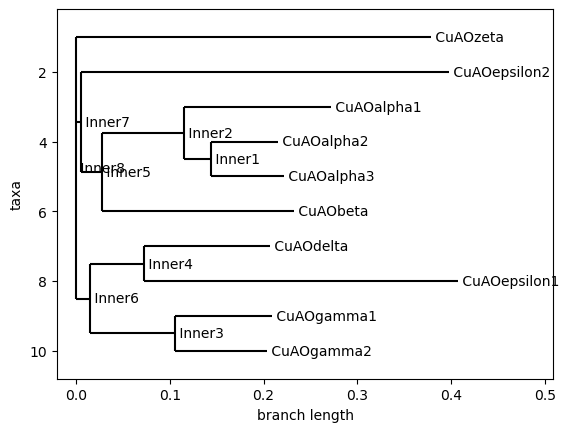

In [16]:
# draw the phylogenetic tree
Phylo.draw(NJTree)

In [17]:
# printing the neighbour joining phylogenetic tree using terminal 
Phylo.draw_ascii(NJTree)

  _________________________________________________________ CuAOzeta
 |
 |____________________________________________________________ CuAOepsilon2
 |
 |                 ________________________ CuAOalpha1
 |    ____________|
 |   |            |     __________ CuAOalpha2
_|___|            |____|
 |   |                 |___________ CuAOalpha3
 |   |
 |   |_______________________________ CuAObeta
 |
 |           ___________________ CuAOdelta
 |  ________|
 | |        |__________________________________________________ CuAOepsilon1
 |_|
   |              _______________ CuAOgamma1
   |_____________|
                 |______________ CuAOgamma2



From looking at the phylogenetic tree output, CuAOzeta is the most divergent and dissimilar to the other genes.
The remaining gene sequences form 2 groups, indicating a closer relationship of these genes within these groups. 